In [2]:
!pwd

/content


In [3]:
!ls

drive  sample_data


In [4]:
cd drive

/content/drive


In [5]:
!ls

'My Drive'


In [6]:
cd 'My Drive'

/content/drive/My Drive


In [7]:
!ls

'Colab Notebooks'   deep-learning-from-scratch-master   IMG_0001.pdf


In [8]:
cd deep-learning-from-scratch-master

/content/drive/My Drive/deep-learning-from-scratch-master


In [9]:
!ls

 ch01   ch05   common	   't10k-images-idx3-ubyte.gz のコピー'
 ch02   ch06   dataset	   't10k-labels-idx1-ubyte.gz のコピー'
 ch03   ch07   LICENSE.md  'train-images-idx3-ubyte.gz のコピー'
 ch04   ch08   README.md   'train-labels-idx1-ubyte.gz のコピー'


In [10]:
cd ch06

/content/drive/My Drive/deep-learning-from-scratch-master/ch06


In [11]:
!pwd

/content/drive/My Drive/deep-learning-from-scratch-master/ch06


In [12]:
!ls

batch_norm_gradient_check.py	overfit_dropout.py
batch_norm_test.py		overfit_weight_decay.py
hyperparameter_optimization.py	weight_init_activation_histogram.py
optimizer_compare_mnist.py	weight_init_compare.py
optimizer_compare_naive.py


In [0]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr
    
  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

In [17]:
network = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
  ...
  x_batch, t_batch = get_mini_batch #ミニバッチ
  grads = network.gradient(x_batch, t_batch)
  params = network.params
  optimizer.update(params, grads)
  ...

ModuleNotFoundError: ignored

In [0]:
class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None
  
  def update(self, params, grads):
    self.v = {}
    for key, val in params.items():
      self.v[key] = np.zeros_like(val)
      
    for key in params.keys():
      self.v[key] = self.momentum*self.v - self.lr*grads[key]
      params[key] += self.v[key]

In [0]:
class AdaGrad:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None
    
  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self,h[key] = np.zeros_like(val)
        
    for key in params.keys():
        self.h[key] += grads[key] * grads[key]
        params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) #1000個のデータ
node_num = 100 #各隠れ層のノード(ニューロン)の数
hidden_layer_size = 5 #隠れ層が5層
activations = {} #ここにアクティベーションの結果を格納する

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]
    
  w = np.random.randn(node_num, node_num) * 1
    
  z = np.dot(x, w)
  a = sigmoid(z) #シグモイド関数!
  activations[i] = a

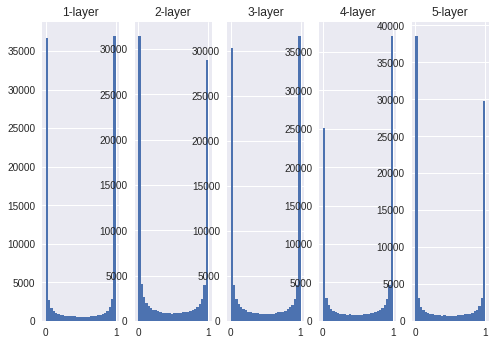

In [21]:
#ヒストグラムを描画
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [0]:
# w = np.random.randn(node_num, node_num) * 1
w = np.random.randn(node_num, node_num) * 0.01

In [0]:
node_num = 100 #前層のノードの数
w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

In [0]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
#過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

In [0]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01) #学習係数0.01のSGDでパラメータ更新

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  
  grads = network.gradient(x_batch, t_batch)
  optimizer.update(network.params, grads)
  
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    epoch_cnt += 1
    if epoch_cnt >= max_epochs:
      break

In [0]:
class Dropout:
  def __init__(self, dropout_ratio=0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None
    
  def forward(self, x, train_flg=True):
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    else:
      return x * (1.0 - self.dropout_ratio)
    
  def backward(self, dout):
    return dout * self.mask

In [0]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

#訓練データをシャッフル
x_train, t_train = shuffle_dataset(x_train, t_train)

#検証データの分類
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [0]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

In [52]:
Best-1 (val acc:0.83) | lr:0.0092, weight decay:3.86e-07
Best-2 (val acc:0.78) | lr:0.00956, weight decay:6.04e-07
Best-3 (val acc:0.77) | lr:0.00571, weight decay:1.27e-06
Best-4 (val acc:0.74) | lr:0.00626, weight decay:1.43e-05
Best-5 (val acc:0.73) | lr:0.0052, weight decay:8.97e-06

SyntaxError: ignored

In [1]:
#cd /content

/content
